In [1]:
import glob
import numpy as np
import pandas as pd
from library.preprocessing import distance
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_BS_pred_deviations(fname):
    df=pd.read_csv(fname)

    if 'down' in fname:
        bs=pd.read_csv("./Labels/down/Bus_stop_down.csv",header=None).values.tolist()
    elif 'up' in fname:
        bs=pd.read_csv("./Labels/up/Bus_stop_up.csv",header=None).values.tolist()

    def find_by_stop_name(lat,long):
        for blat,blong,bsname in bs:
            if distance(lat,long,blat,blong)<30:
                return bsname
        return np.nan

    df['BS_name']=df[['lat','long']].apply(lambda e:find_by_stop_name(e[0],e[1]),axis=1)

    df=df.dropna().reset_index(drop='index')[['pred_minus_start_time(min)','BS_name','Is_Bus_stop']]

    return df

# 1. choose 4 trails 1 from each timezone. Give bar plots for the time deviation.

In [3]:
def plot_and_save(df1,save_name=None):
    fig, ax = plt.subplots(figsize=(11,7))

    ax.bar(x=np.arange(len(df1.BS_name)),height=df1['pred_minus_start_time(min)'],align='center', alpha=1,
           color=['grey' if case==1 else 'darkblue' for case in df1.Is_Bus_stop])

    ax.set_xlabel("Bus-stops",fontsize=26, fontweight='bold')
    ax.set_ylabel("Error (Min)",fontsize=26, fontweight='bold')

    ax.set_xticks(np.arange(len(df1.BS_name)))
    ax.set_xticklabels(df1.BS_name,fontsize=26, fontweight='bold',rotation=45)
    plt.yticks(fontsize=26, fontweight='bold')
    plt.tight_layout()
    plt.grid()
    plt.close()
    fig.savefig("./report/plots/"+save_name)

# Down

In [4]:
df1=get_BS_pred_deviations("./report/test_files/down_Early_Morning_pred_time_from_prev_12_2019-07-05.csv")
plot_and_save(df1,'down_Early_Morning_error.png')

df1=get_BS_pred_deviations("./report/test_files/down_Morning_pred_time_from_prev_14_2019-07-05.csv")
plot_and_save(df1,'down_Morning_error.png')

df1=get_BS_pred_deviations("./report/test_files/down_Afternoon_pred_time_from_prev_16_2019-07-05.csv")
plot_and_save(df1,'down_Afternoon_error.png')

df1=get_BS_pred_deviations("./report/test_files/down_Evening_pred_time_from_prev_17_2019-07-05.csv")
plot_and_save(df1,'down_Evening_error.png')

# up

In [5]:
df1=get_BS_pred_deviations("./report/test_files/up_Early_Morning_pred_time_from_prev_31_2019-07-05.csv")
plot_and_save(df1,'up_Early_Morning_error.png')

df1=get_BS_pred_deviations("./report/test_files/up_Morning_pred_time_from_prev_32_2019-07-05.csv")
plot_and_save(df1,'up_Morning_error.png')

df1=get_BS_pred_deviations("./report/test_files/up_Afternoon_pred_time_from_prev_34_2019-07-05.csv")
plot_and_save(df1,'up_Afternoon_error.png')

df1=get_BS_pred_deviations("./report/test_files/up_Evening_pred_time_from_prev_35_2019-07-05.csv")
plot_and_save(df1,'up_Evening_error.png')

# 2. Box plot for daywise time deviation.

In [6]:
def get_error_list_for_the_day(date):
    df=pd.concat([get_BS_pred_deviations(f) for f in glob.glob(f"./report/test_files/*_{date}.csv")])
    return df['pred_minus_start_time(min)'].values

In [7]:
test_dates=['2019-06-28','2019-06-30','2019-07-01','2019-07-02','2019-07-03','2019-07-04','2019-07-05']
error_lists=[get_error_list_for_the_day(date) for date in test_dates]

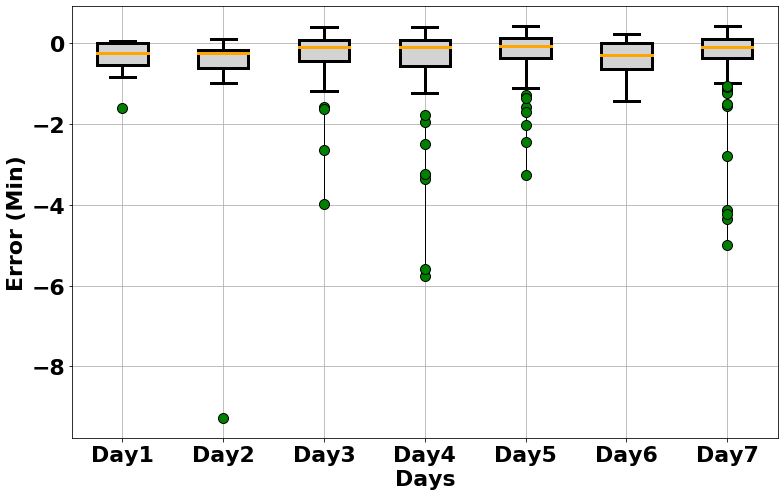

In [8]:
fig, ax = plt.subplots(figsize=(11,7))

pos=[1,2,3,4,5,6,7]
sep=0.7

bp1=\
ax.boxplot( error_lists,
            positions=pos,
            showfliers=True,notch=False,patch_artist=True, boxprops=dict(linewidth=3.0,color='black',facecolor="lightgrey"),
            whiskerprops = dict(linestyle='-',linewidth=3.0, color='black'),
            flierprops=dict(marker='o', markerfacecolor='green', markersize=10,linestyle='-'),
            capprops=dict(linestyle='-',linewidth=3.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=3.0, color='orange')
          )

ax.set_xlabel("Days",fontsize=22, fontweight='bold')
ax.set_ylabel("Error (Min)",fontsize=22, fontweight='bold')

ax.set_xticks(pos)
ax.set_xticklabels([f'Day{d}' for d in pos],fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.tight_layout()
plt.grid()
fig.savefig("./report/plots/daywise_error_boxplot.png")

In [11]:
#NICE